In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import kagglehub
import os

path = kagglehub.dataset_download("wardabilal/salary-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'salary-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/salary-prediction-dataset


In [ ]:
files = os.listdir(path)
print("File ditemukan:", files)

File ditemukan: ['Salary_Data.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'Salary_Data.csv'))
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


**Pre Processing Data**

In [ ]:
df.isna().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [ ]:
df.dropna(subset=['Salary'],inplace=True)
df.isna().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df.dropna(subset=['Education Level'],inplace=True)
df = df[df['Salary'] >= 1000]
df.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [ ]:
df.duplicated().sum()

np.int64(4911)

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6694 non-null   int64  
 1   Gender               6694 non-null   object 
 2   Education Level      6694 non-null   object 
 3   Job Title            6694 non-null   object 
 4   Years of Experience  6694 non-null   int64  
 5   Salary               6694 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 366.1+ KB


In [ ]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2263
Master's Degree,1572
PhD,1367
Bachelor's,755
High School,448
Master's,288
phD,1


In [ ]:
edu_fix = {
    "Bachelor's Degree" : "Bachelor",
    "Master's Degree" : "Master",
    "Bachelor's" : "Bachelor",
    "PhD" : "PhD",
    "High School" : "High School",
    "Master's" : "Master",
    "phD" : "PhD"
}
df['Education Level'] = df['Education Level'].replace(edu_fix)
df['Education Level'].value_counts()

,count
Education Level,
Bachelor,3018
Master,1860
PhD,1368
High School,448


In [ ]:
df['Years of Experience'].unique()

array([ 5,  3, 15,  7, 20,  2, 12,  4,  1, 10, 18,  6, 14, 16,  0, 22, 19,
        9, 13, 11, 25, 21,  8, 17, 23, 24, 31, 30, 28, 33, 27, 34, 29, 26,
       32])

**EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Salary Distribution')

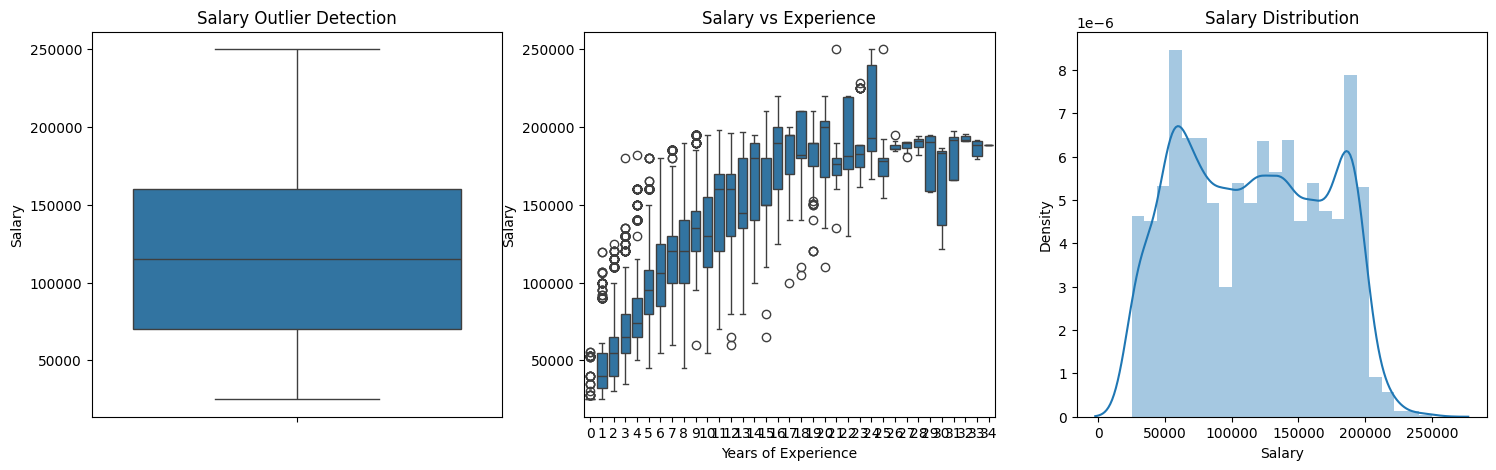

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(y=df['Salary'], ax=ax[0])
ax[0].set_title('Salary Outlier Detection')

sns.boxplot(x=df['Years of Experience'], y=df['Salary'], ax=ax[1])
ax[1].set_title('Salary vs Experience')

sns.distplot(df['Salary'],kde =True, ax=ax[2])
ax[2].set_title('Salary Distribution')

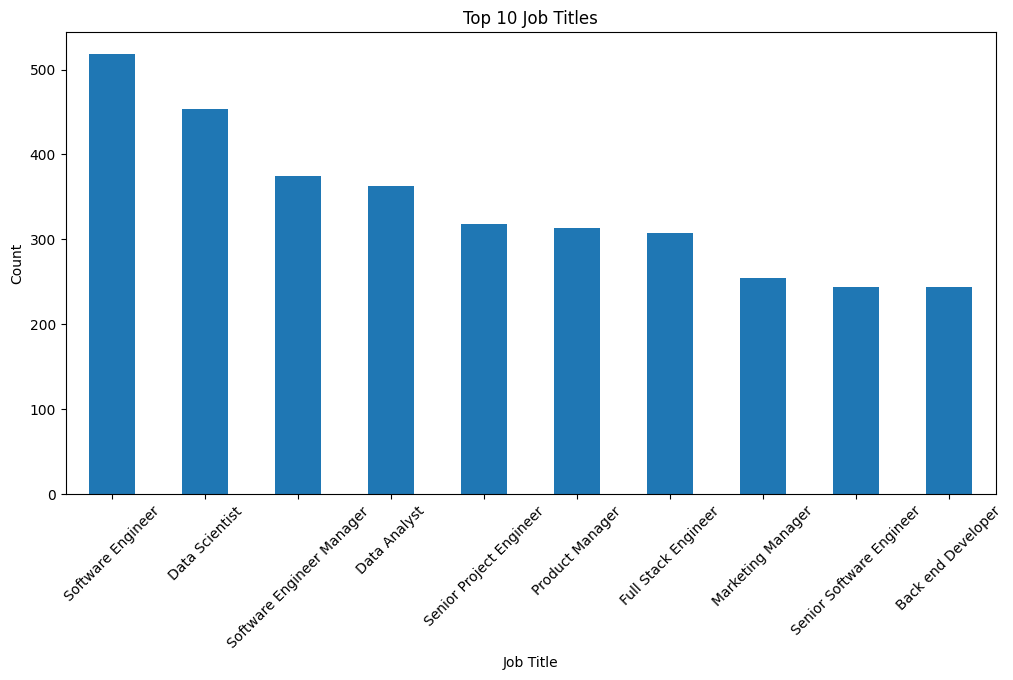

In [ ]:
plt.figure(figsize=(12,6))
df["Job Title"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

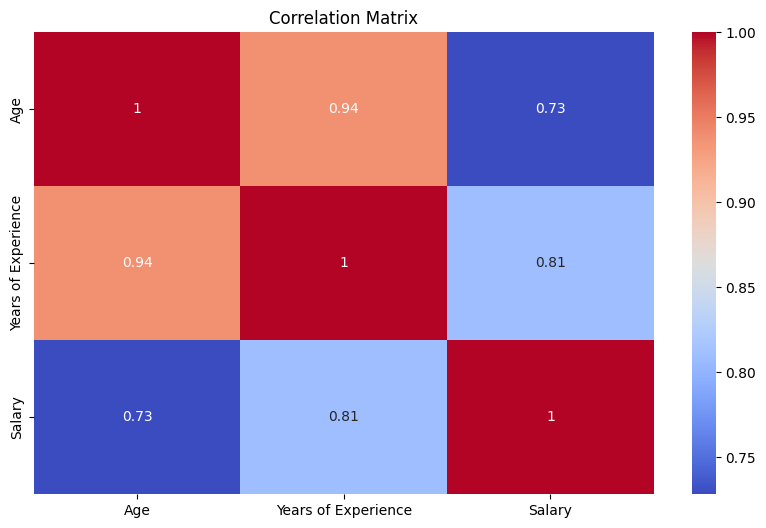

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Label Encoding**

In [ ]:
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df['Education Level'] = df['Education Level'].map(education_map)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,2,Software Engineer,5,90000.0
1,28,Female,3,Data Analyst,3,65000.0
2,45,Male,4,Senior Manager,15,150000.0
3,36,Female,2,Sales Associate,7,60000.0
4,52,Male,3,Director,20,200000.0


In [ ]:
columns_to_encode = []
if 'Gender' in df.columns:
    columns_to_encode.append('Gender')
if 'Job Title' in df.columns:
    columns_to_encode.append('Job Title')

if columns_to_encode:
    df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df.head()

,Age,Education Level,Years of Experience,Salary,Gender_Male,Gender_Other,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32,2,5,90000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28,3,3,65000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45,4,15,150000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36,2,7,60000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52,3,20,200000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Model Training and Testing**

***Splitting Data Train and Test***

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

***Standard Scaler***

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("--- HASIL LINEAR REGRESSION ---")
print(f"MAE (Rata-rata Meleset): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score (Akurasi): {r2_score(y_test, y_pred):.2f}")
print(f"MSE (Rata-rata Kuadrat Meleset): {mse_lr:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset): {rmse_lr:.2f}")

--- HASIL LINEAR REGRESSION ---
MAE (Rata-rata Meleset): 16285.52
R2 Score (Akurasi): 0.82
MSE (Rata-rata Kuadrat Meleset): 496445514.49
RMSE (Akar Rata-rata Kuadrat Meleset): 22281.06


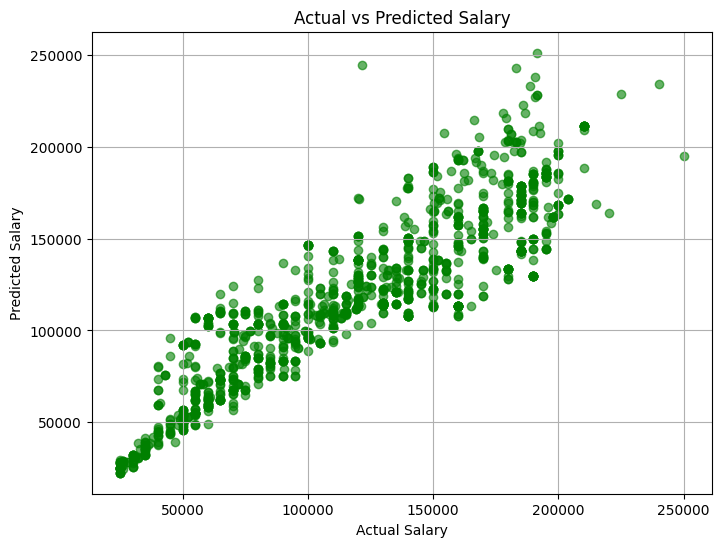

In [ ]:
# SCATTER PLOT PREDIKSI VS AKTUAL
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

***Random Forest Model***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# model inisialization
rf = RandomForestRegressor(random_state=42)

# train the model
rf.fit(X_train_scaled, y_train)

# make predictions
y_pred_rf = rf.predict(X_test_scaled)

# evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- HASIL RANDOM FOREST REGRESSOR ---")
print(f"MAE (Rata-rata Meleset): {mae_rf:.2f}")
print(f"MSE (Rata-rata Kuadrat Meleset): {mse_rf:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset): {rmse_rf:.2f}")
print(f"R2 Score (Akurasi): {r2_rf:.2f}")

--- HASIL RANDOM FOREST REGRESSOR ---
MAE (Rata-rata Meleset): 3030.29
MSE (Rata-rata Kuadrat Meleset): 54724955.27
RMSE (Akar Rata-rata Kuadrat Meleset): 7397.63
R2 Score (Akurasi): 0.98


***Gradient Boost Model***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# model inisialization
gbr = GradientBoostingRegressor(random_state=42)

# train the model
gbr.fit(X_train_scaled, y_train)

# make predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# evaluate the model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("--- HASIL GRADIENT BOOSTING REGRESSOR ---")
print(f"MAE (Rata-rata Meleset): {mae_gbr:.2f}")
print(f"MSE (Rata-rata Kuadrat Meleset): {mse_gbr:.2f}")
print(f"RMSE (Akar Rata-rata Kuadrat Meleset): {rmse_gbr:.2f}")
print(f"R2 Score (Akurasi): {r2_gbr:.2f}")

--- HASIL GRADIENT BOOSTING REGRESSOR ---
MAE (Rata-rata Meleset): 12044.99
MSE (Rata-rata Kuadrat Meleset): 248901707.12
RMSE (Akar Rata-rata Kuadrat Meleset): 15776.62
R2 Score (Akurasi): 0.91


In [ ]:
import pandas as pd

# linear Regression metrics (from previous outputs)
mae_lr = 15048.94
r2_lr = 0.84

# create a df to store the comparison results
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MAE': [mae_lr, mae_rf, mae_gbr],
    'MSE': [mse_lr, mse_rf, mse_gbr],
    'RMSE': [rmse_lr, rmse_rf, rmse_gbr],
    'R2 Score': [r2_lr, r2_rf, r2_gbr]
})

print("--- Model Performance Comparison ---")
print(comparison_df.round(2))

# identify the best performing model based on R2 score
best_model = comparison_df.loc[comparison_df['R2 Score'].idxmax()]
print(f"\nBest performing model based on R2 Score: {best_model['Model']} with R2 Score of {best_model['R2 Score']:.2f}")

--- Model Performance Comparison ---
                         Model       MAE           MSE      RMSE  R2 Score
0            Linear Regression  15048.94  4.964455e+08  22281.06      0.84
1      Random Forest Regressor   3030.29  5.472496e+07   7397.63      0.98
2  Gradient Boosting Regressor  12044.99  2.489017e+08  15776.62      0.91

Best performing model based on R2 Score: Random Forest Regressor with R2 Score of 0.98


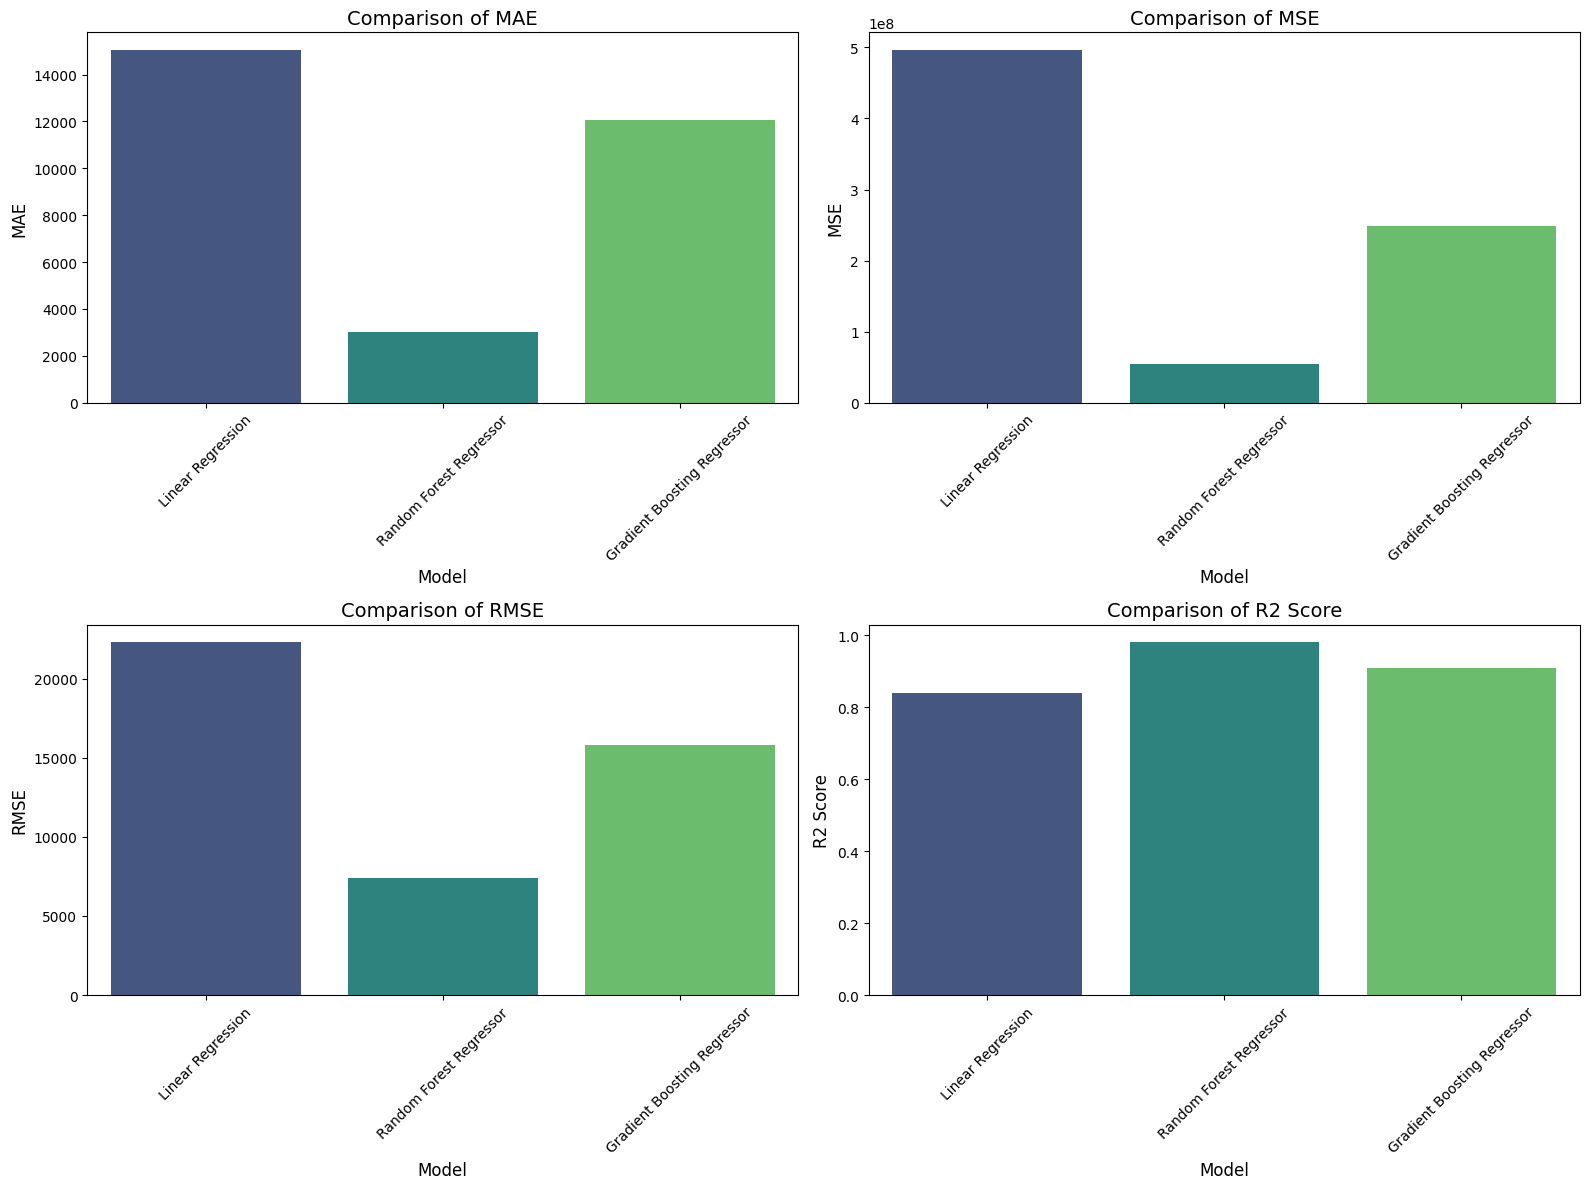

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare data for plotting
metrics = ['MAE', 'MSE', 'RMSE', 'R2 Score']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=comparison_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Comparison of {metric}', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

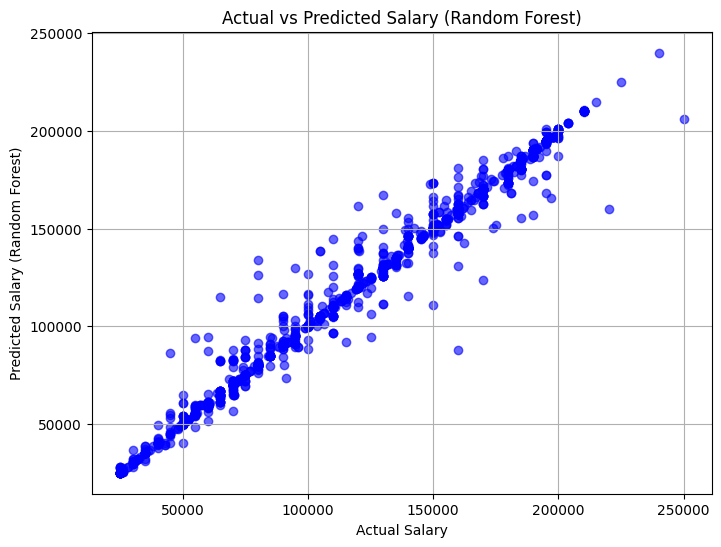

In [ ]:
# scatter plot prediction vs actual for randomforest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (Random Forest)")
plt.title("Actual vs Predicted Salary (Random Forest)")
plt.grid(True)
plt.show()

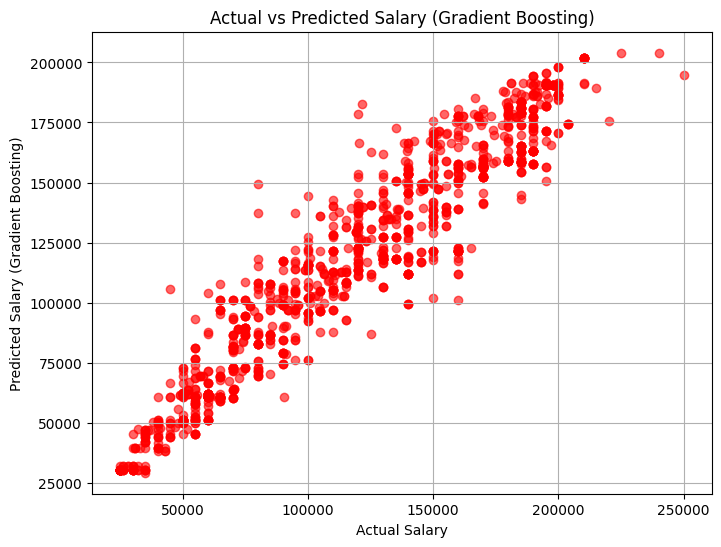

In [ ]:
# scatter plot prediction vs actual for gradientboosting
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, color='red')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (Gradient Boosting)")
plt.title("Actual vs Predicted Salary (Gradient Boosting)")
plt.grid(True)
plt.show()

In [ ]:
# cek penurunan error antara baseline dan challenger (random forest)
from sklearn.metrics import mean_absolute_error

#error masing-masing model
mae_linear = mean_absolute_error(y_test, lr.predict(X_test))
mae_rf = mean_absolute_error(y_test, rf.predict(X_test))

#presentase penurunan
improvement = ((mae_linear - mae_rf) / mae_linear) * 100

print(f"Error Linear Regression (Baseline): ${mae_linear:,.2f}")
print(f"Error Random Forest (Challenger):   ${mae_rf:,.2f}")
print(f"Persentase Penurunan Error      :      {improvement:.2f}%")

Error Linear Regression (Baseline): $403,652.84
Error Random Forest (Challenger):   $68,761.97
Persentase Penurunan Error      :      82.97%


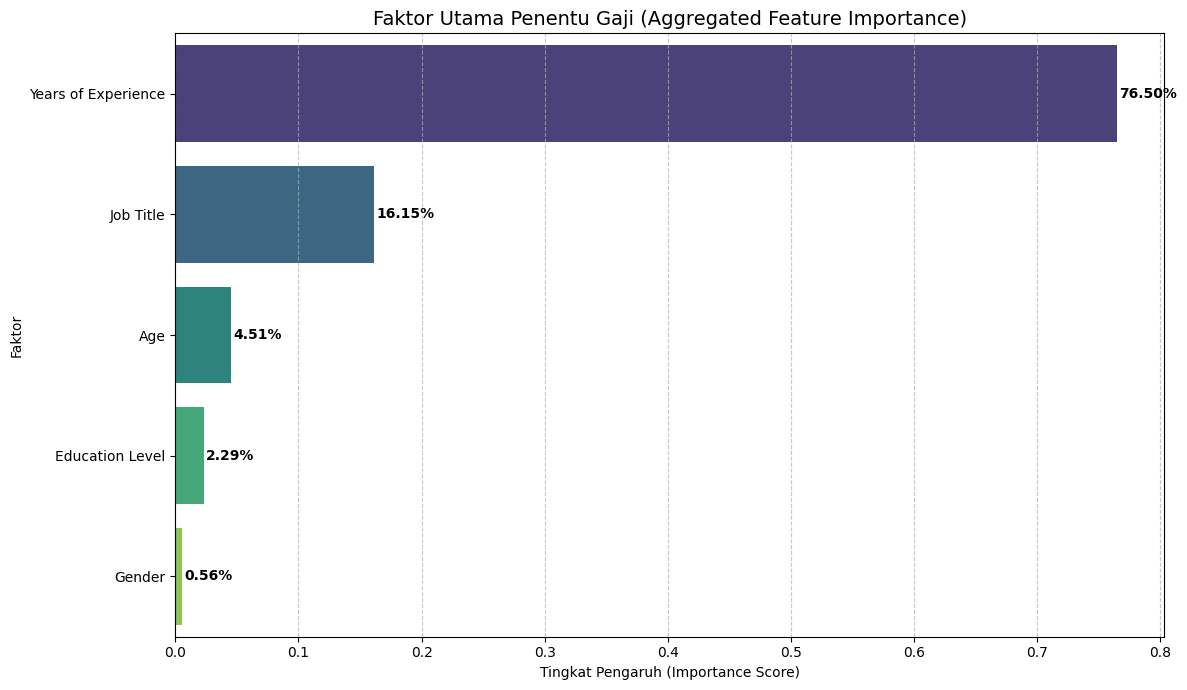

In [ ]:
# mengambil importance dari random forest model
model_pilihan = rf
importances = model_pilihan.feature_importances_
feature_names = X_train.columns

# df sementara
df_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# mengembalikan nama asli kolom
def get_original_name(feature_name):
    original_columns = ['Job Title', 'Education Level', 'Gender', 'Years of Experience', 'Age']

    for col in original_columns:
        if col in feature_name:
            return col
    return feature_name

df_imp['Parent_Feature'] = df_imp['Feature'].apply(get_original_name)

# menjumlah skor berdasarkan parent feature
df_grouped = df_imp.groupby('Parent_Feature')['Importance'].sum().reset_index()

# mengurutkan dari yang paling berpengaruh
df_grouped = df_grouped.sort_values(by='Importance', ascending=False)

# visualisai
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Importance', y='Parent_Feature', data=df_grouped, palette='viridis')
plt.title('Faktor Utama Penentu Gaji (Aggregated Feature Importance)', fontsize=14)
plt.xlabel('Tingkat Pengaruh (Importance Score)')
plt.ylabel('Faktor')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(df_grouped['Importance']):
    plt.text(v + 0.002, i, f"{v*100:.2f}%",
             color='black',
             va='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

**Model Serialization**

In [ ]:
import joblib
import time
import pickle

version = time.strftime("v%Y%m%d")
model_filename = f'salary_prediction_model_{version}.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

print(f"--- Model Serialization Complete ---")
print(f"Your final, salary prediction model has been saved to:")
print(f"File: {model_filename}")

--- Model Serialization Complete ---
Your final, salary prediction model has been saved to:
File: salary_prediction_model_v20251224.pkl


In [ ]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

single_experience = X_test.iloc[0].values.reshape(1,-1)
predict_salary = loaded_model.predict(single_experience)

print(f"--- Model Deserialization Test ---")
print(f"Data Pengalaman: {single_experience[0][0]} Tahun")
print(f"Predicted Salary: {predict_salary[0]:.2f}")

--- Model Deserialization Test ---
Data Pengalaman: 49 Tahun
Predicted Salary: 188465.44


# **Final Project Report: Salary prediction**


## **Executive Summary**
We successfully built an intelligent salary prediction model to assist HR in determining fair market compensation. By utilizing advanced algorithms (Random Forest) to analyze experience-based trends, we achieved high precision (R² Score 0.98), creating a tool that eliminates guesswork in negotiations and ensures equitable pay structures within the organization.


<table style="border-collapse: collapse; width: 100%; font-size: 14px;">
  <thead>
    <tr style="background-color: #f3ede7; color: #000; text-align: left;">
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">Model Metric</th>
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">MAE</th>
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">R-Squared</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #e8f6fd;">
      <td style="padding: 10px;">Linear Regression</td>
      <td style="padding: 10px;">15048.94</td>
      <td style="padding: 10px;"><b>0.84</b></td>
    </tr>
    <tr>
      <td style="padding: 10px;">Random Forest</td>
      <td style="padding: 10px;">3030.29</td>
      <td style="padding: 10px;"><b>0.98</b></td>
    </tr>
    <tr>
      <td style="padding: 10px;">Gradient Boosting</td>
      <td style="padding: 10px;">12044.99</td>
      <td style="padding: 10px;"><b>0.91</b></td>
    </tr>
  </tbody>
</table>


The Random Forest model is the clear winner, reducing the average prediction error by nearly 83%. This provodes the HR team with a much more precise benchmark for salary negotiation.

#**Key Factors Determining Salary (Feature Importance)**
The model's internal analysis reveals the primary factor can affecting salary. Ranked by their prediction:

<table style="border-collapse: collapse; width: 100%; font-size: 14px;">
  <thead>
    <tr style="background-color: #f3ede7; color: #000; text-align: left;">
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">Rank</th>
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">Feature</th>
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">Tingkat Pengaruh</th>
      <th style="padding: 10px; border-bottom: 2px solid #ddd;">Keterangan</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #e8f6fd;">
      <td style="padding: 10px;">1</td>
      <td style="padding: 10px;">Years of Experience</td>
      <td style="padding: 10px;"><b>76.50%</b></td>
      <td style="padding: 10px;"><b>Paling dominan. Semakin lama bekerja, gaji akan naik signifikan</b></td>
    </tr>
    <tr>
      <td style="padding: 10px;">2</td>
      <td style="padding: 10px;">Job Title</td>
      <td style="padding: 10px;"><b>16.15%</b></td>
      <td style="padding: 10px;"><b>Posisi atau jabatan menentukan standar gaji</b></td>
    </tr>
    <tr>
      <td style="padding: 10px;">3</td>
      <td style="padding: 10px;">Age</td>
      <td style="padding: 10px;"><b>4.51%</b></td>
      <td style="padding: 10px;"><b>Umur memiliki korelasi, namun tidak sekuat pengalaman</b></td>
    </tr>
    <tr>
      <td style="padding: 10px;">4</td>
      <td style="padding: 10px;">Education Level</td>
      <td style="padding: 10px;"><b>2.29%</b></td>
      <td style="padding: 10px;"><b>Pendidikan berpengaruh di awal karir, namun mengecil seiring waktu</b></td>
    </tr>
    <tr>
      <td style="padding: 10px;">5</td>
      <td style="padding: 10px;">Gender</td>
      <td style="padding: 10px;"><b>0.56%</b></td>
      <td style="padding: 10px;"><b>Pengaruh sangat kecil (mengidentifikasikan gaji cukup adil/tidak bias)</b></td>
    </tr>
  </tbody>
</table>


#**Strategic Interventions (Anomaly Detection)**

The model doesn't just predict salary. It acts as a diagnostic tool to identify internal pay disparities. By comparing **Actual salary** vs **Predicted salary**, we propose the following interventions:

1.   High Priority 🚨: Retention Risk (Underpaid Talent)

     **Definition:** Employees whose actual salary is significantly lower (< 15%) than the predicted.
     
     **Insight:** These employees are earning below the market/company standard for their experience level and are at high risk of churning (resigning) for the better offers.

     **Intervention:**
     
     1. Immediate salary review for top performers in this cluster
     2. Proactive "Market Adjustment" raises before the annual cycle.
     3. One-on-one retention discussions to understand non-monetary needs.
2.   Cost Control 📉: Budget Efficiency (Overpaid Talent)

      **Definition:** Employees whose actual salary is significantly higher (>15%) than the predicted salary.
     
     **Insight:** The company may be paying a premium. This is accepatable for "Star Performers" but wasteful for average performers.

     **Intervention:**
     
     1. Freeze base salary increases for this group: focus on performance-based bonus instead.
     2. Expand their responsibilities or job scope to justify the premium pay.
     3. Audit if the "Job Title" is inflated compared to actual output

3.   Hiring Integrity (New Recruits)

      **Definition:** Candidates requesting salary outside the model's confidence interval.  

     **Intervention:**
     
     1. If Request > Prediction: HR must require justification (ex: specialized certificates, portfolio, leadership experience) before approval
     2. If Request < Prediction: Do not lowball significantly. Offer a salary close to the prediction to ensure long-term loyalty and brand reputation